# Inverse Variance Trading strategy
1. Get the EOD data of top large cap stocks.
2. Calculate inverse variance of the stocks.
3. Calculate the portfolio weights.

In [1]:
import pandas as pd
import pandas_datareader as pdr
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Get data 
start_date = datetime(1980, 1, 1)
end_date = datetime.today()
initial_capital = 1000000

stocks = ['MSFT','AAPL','GOOG','AMZN','XOM','HSBC','BRK-B','JPM','BAC','WFC']

# stocks = ['NESTLEIND.NS', 'BATAINDIA.NS', 'ITC.NS', 
#           'BPCL.NS', 'RELIANCE.NS', 'VEDL.NS', 'TCS.NS',
#           'INFY.NS', 'HINDPETRO.NS', 'ONGC.NS', 'BAJAJ-AUTO.NS', 
#          'COALINDIA.NS', 'DABUR.NS', 'HDFC.NS', 'IOC.NS',
#          'HINDUNILVR.NS']

spy = pdr.get_data_yahoo(symbols='SPY', start=start_date, end=end_date)
stock_data = pdr.get_data_yahoo(symbols=stocks, start=start_date, end=end_date)
stock_data.dropna(inplace=True)

In [3]:
# Calculate Benchmark Returns
spy['Returns'] = spy['Adj Close'].pct_change(1)

# Calculate returns
for ticker in stock_data.columns.levels[1]:
    stock_data['Return', ticker] = stock_data['Adj Close', ticker].pct_change(1)

# Calculate Inverse Variance
for ticker in stock_data.columns.levels[1]:
    stock_data['InvVar', ticker] = stock_data['Return', ticker].rolling(100).apply(lambda x: 1/x.var(), raw=False)
    
# Calculate Portfolio weights
df = stock_data.InvVar
df = df.div(df.sum(axis=1), axis=0)
for ticker in stock_data.columns.levels[1]:
    stock_data['Weights', ticker] = df[ticker].round(2)
del df

# Remove NaN values
stock_data.dropna(inplace=True)

# Portfolio Returns
1. Get Change in weights
2. Get number of shares
3. Get Trading costs
4. Calculate Porfolio Value and Cumulative returns.

In [4]:
Portfolio = stock_data[['Adj Close', 'Weights']]

stock_val = np.array(Portfolio['Adj Close'])
stock_weight = np.array(Portfolio['Weights'])
port_val = np.empty(shape=stock_val.shape[0])
shares_holding = np.empty(shape=stock_val.shape)
traded_volume = np.zeros(shape=stock_val.shape)
traded_value = np.zeros(shape=stock_val.shape)
trading_cost = np.zeros(shape=stock_val.shape)

shares_holding[0] = np.round_(stock_weight[0]/stock_val[0]*initial_capital)
port_val[0] = np.dot(shares_holding[0], stock_val[0])

for ind in range(1, len(stock_val)):
    shares_holding[ind] = shares_holding[ind-1] + np.round_((stock_weight[ind]-stock_weight[ind-1])/stock_val[ind]*port_val[ind-1])
    traded_volume[ind] = shares_holding[ind] - shares_holding[ind-1]
    traded_value[ind] = traded_volume[ind]*stock_val[ind]
    trading_cost[ind] = 0.01*abs(traded_value[ind])   
    port_val[ind] = np.dot(shares_holding[ind], stock_val[ind])
    port_val[ind] = port_val[ind] - traded_value[ind].sum() - trading_cost[ind].sum()
    
Portfolio['Value'] = port_val 
Portfolio['Return'] = Portfolio['Value'].pct_change(1)
Traded_Volume = pd.DataFrame(data=traded_volume, index=Portfolio['Adj Close'].index, columns=Portfolio['Adj Close'].columns)
Traded_Value = pd.DataFrame(data=traded_value, index=Portfolio['Adj Close'].index, columns=Portfolio['Adj Close'].columns)
Trading_Cost = pd.DataFrame(data=trading_cost)
Shares_Holding = pd.DataFrame(data=shares_holding, index=Portfolio['Adj Close'].index, columns=Portfolio['Adj Close'].columns)

del stock_val 
del stock_weight 
del port_val 
del shares_holding
del traded_volume
del traded_value
del trading_cost

c:\users\napha\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\napha\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<Figure size 432x288 with 0 Axes>

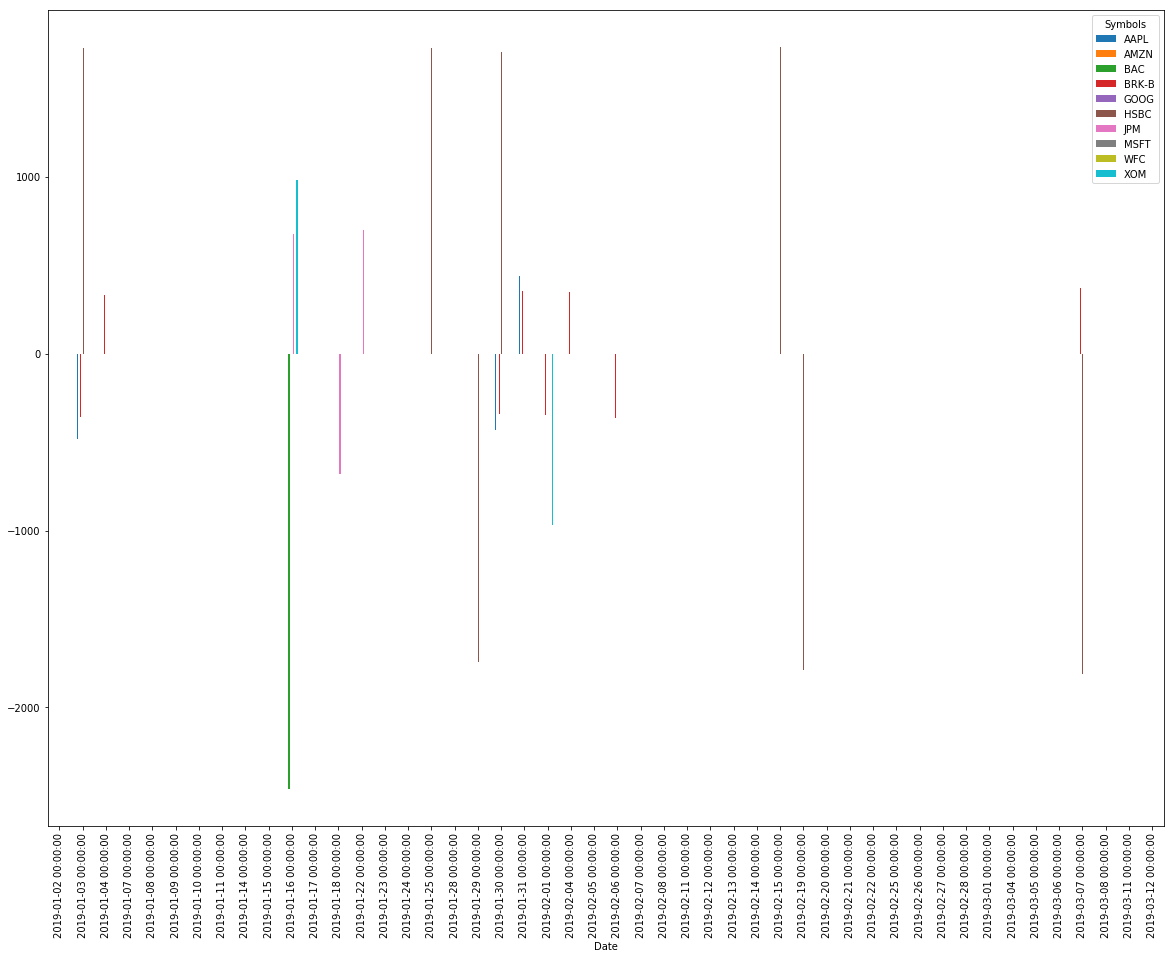

<Figure size 432x288 with 0 Axes>

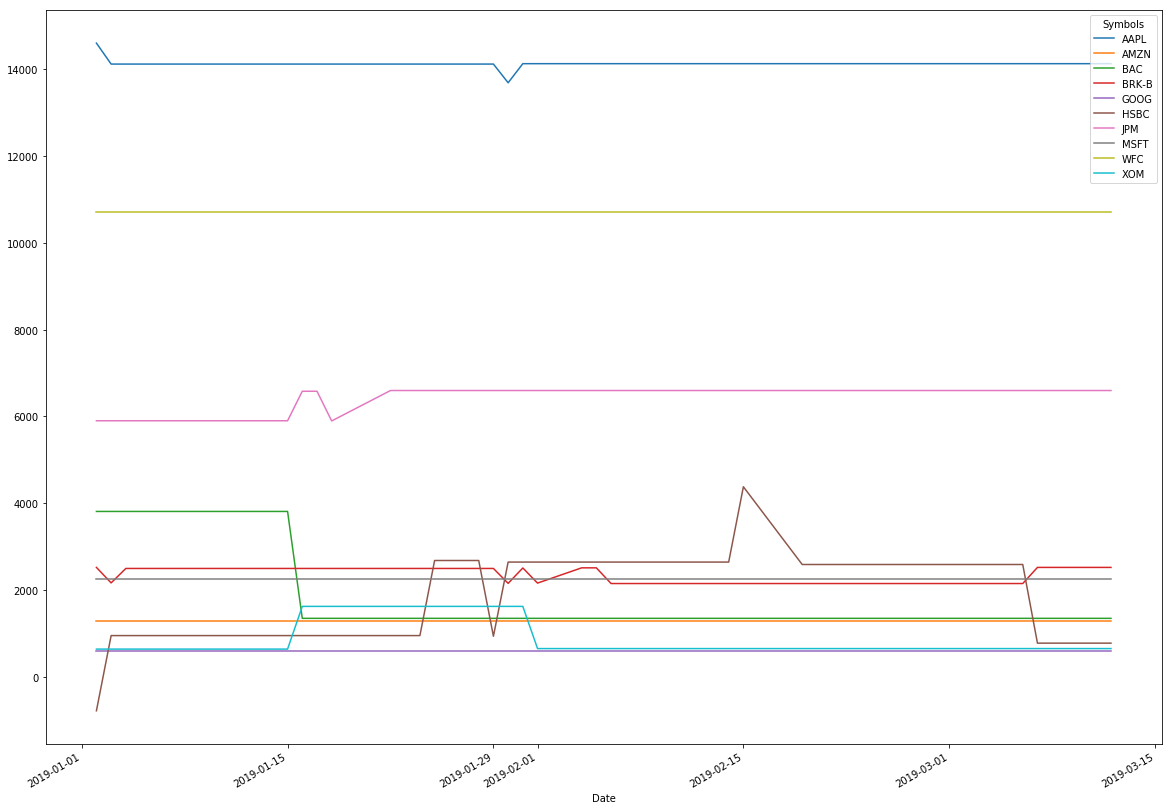

In [5]:
plt.figure()
Traded_Volume['2019-1-1':].plot(kind='bar', figsize=(20,15))
plt.figure()
Shares_Holding['2019-1-1':].plot(kind='line', figsize=(20,15))

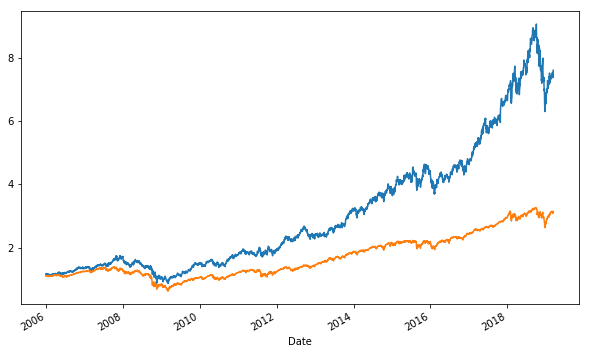

In [6]:
(Portfolio['Value']/Portfolio['Value'].iloc[0])['2006-1-1':].plot(figsize=(10,6))
(spy['Adj Close']/spy['Adj Close'][Portfolio['Value'].index.values[0]])['2006-1-1':].plot()

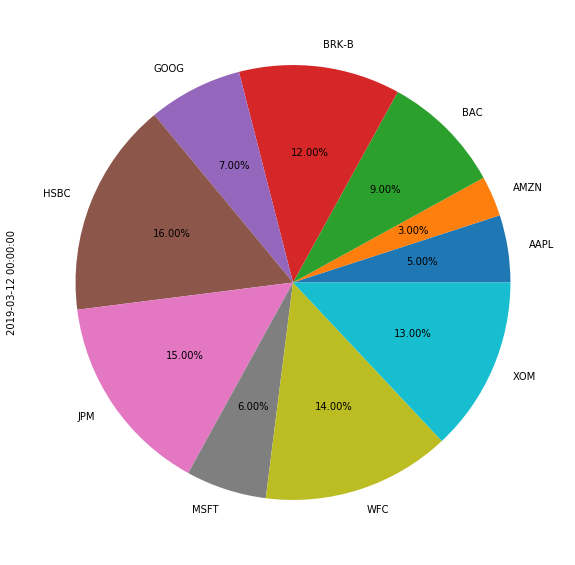

In [7]:
Portfolio['Weights'].iloc[-1].plot(kind='pie', autopct='%.2f%%',  figsize=(10,10))

In [13]:
Traded_Volume.iloc[-1].to_dict()

{'AAPL': 0.0,
 'AMZN': 0.0,
 'BAC': 0.0,
 'BRK-B': 0.0,
 'GOOG': 0.0,
 'HSBC': 0.0,
 'JPM': 0.0,
 'MSFT': 0.0,
 'WFC': 0.0,
 'XOM': 0.0}